<a href="https://colab.research.google.com/github/Sugandaram/Akaike-Technologies-Assignment-Submission/blob/main/NLP_Tweeter__Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 4.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17414 sha256=71dacdb799720bba2aae1c6d7c4e4d852756dd77a3390032133ca64bafcb52e6
  Stored in directory: /root/.cache/pip/wheels/a9/25/af/715361fa79594524c89c75d293def652045f3fdce6ca398712
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0


In [2]:
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('stopwords')
nltk.download('brown')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
#Importing Pandas to work with dataframe
import pandas as pd     

#Importing numpy for working with numpy arrays and other functions
import numpy as np      

#Importing json for reading the json file of tweets
import json

import re

#Elimination of Stop words
from nltk.corpus import stopwords 
from nltk.util import ngrams 

#Counting the frequency
from collections import Counter

#NLP Toolkit
import nltk


# For visualization:
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Translator from googletrans for tweet translation purpose
from googletrans import Translator

In [8]:
with open('tweets.json') as jfile:
  
  df = json.load(jfile)

In [9]:
df

{'1374140386071961602': {'tweet_author': 'Hematopoiesis News',
  'tweet_text': '⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r'},
 '1374032432173842437': {'tweet_author': 'Michael Wang, MD',
  'tweet_text': 'This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N'},
 '1373902876553048065': {'tweet_author': '1stOncology',
  'tweet_text': '#NICE backs #AstraZenecas #Calquence for #CLL https://t.co/Vb5lPDoGrA'},
 '1373656782367813635': {'tweet_author': 'Toby Eyre',
  'tweet_text': '#acalabrutinib is a valuable option in pts intolerant to #ibrutinib. Further valuable data to help decision making in #CLL \n\nEarly View | Haematologi

In [10]:

temp='tweet_author'
lst1 = [val[temp] for key, val in df.items() if temp in val]

temp1='tweet_text'
lst2 = [val[temp1] for key, val in df.items() if temp1 in val]

#Dropping id as it is of no use
data = pd.DataFrame(list(zip(lst1, lst2)),
               columns =['tweet_author', 'tweet_text'])

#For use in objective 2 making a copy of data
data_copy=data.copy()
     

In [11]:
data

,tweet_author,tweet_text
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...
...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...


In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [13]:
!pip install Translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from googletrans import Translator


In [15]:
#Converting Tweets into English

#Function for translating the tweets into English
translator = Translator(service_urls=[
      'translate.google.com',
      'translate.google.co.kr',
    ])
data['tweet_text'].astype(str)
data = data.loc[data['tweet_text'] != '']

#Replacing '.' with '. ' for Data translation issue
data['tweet_text'] = data['tweet_text'].str.replace('.', '. ',regex=True)
 
#Some tweets are in japanese so converting it into english
#data['tweet_text']=data['tweet_text'].apply(translator.translate, src='ja', dest='en').apply(getattr, args=('text',))
# data['clean_tweet']=data['clean_tweet'].apply(translator.translate, src='hi', dest='en').apply(getattr, args=('text',))

In [16]:
data

,tweet_author,tweet_text
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...
...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...


In [17]:
#removing hashtags (word starting with #)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['tweet_text'], "#[\w]*")

#removing hashtags (word starting with https)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['clean_tweet'], "https[\w]*")

#remove user, https, and RT
data['clean_tweet'] = np.vectorize(remove_pattern)(data['clean_tweet'], "https|RT|@[\w]*")

#remove punctuations
data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

#lowering string
data['clean_tweet'] = data['clean_tweet'].str.lower()

#remove stop words
stop_words = set(stopwords.words('english')) 


# #remove words with len < 2
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

<ipython-input-17-3828b6d18eac>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")


In [18]:
#Creating a list of clean tweets 
data['clean_tweet'] = [' '.join([w for w in x.lower().split() if w not in stop_words]) 
    for x in data['clean_tweet'].tolist()]

In [19]:
data

,tweet_author,tweet_text,clean_tweet
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists conducted phase study acalabrutinib...
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,phase acalabrutinib venetoclax trial still rec...
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,backs lpdogra
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,valuable option pts intolerant valuable data h...
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice recommended use acalabrutinib patients tr...
...,...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...,hanging friends http pdleww bbb
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...,hanging friends http gynchdnul
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...,zusatznutzen von ist weder noch refrakt res fo...
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,ptk expression immunochemotherapy outcome chro...


In [20]:

print(data['tweet_text'][0])

⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%.  
https://t. co/eJ6m4QpC5P https://t. co/kuZz6ZO47r


In [21]:
print(data["clean_tweet"][0])

scientists conducted phase study acalabrutinib patients relapsed refractory ibrutinib intolerant found overall response rate qpc kuzz


In [22]:
from textblob import TextBlob
wiki = TextBlob('Pink Pearl Apples are tasty but Empire Apples are not.')# checking polarity of given sentence
wiki.noun_phrases
     

WordList(['pink pearl apples', 'apples'])

In [23]:
def blob(text):
  return TextBlob(text).noun_phrases

Entities = data['clean_tweet'].apply(blob)
data["entities"]=Entities

In [24]:
data

,tweet_author,tweet_text,clean_tweet,entities
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists conducted phase study acalabrutinib...,"[phase study acalabrutinib patients, refractor..."
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,phase acalabrutinib venetoclax trial still rec...,"[phase acalabrutinib venetoclax trial, recruit..."
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,backs lpdogra,[backs lpdogra]
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,valuable option pts intolerant valuable data h...,"[valuable option pts intolerant, valuable data..."
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice recommended use acalabrutinib patients tr...,[acalabrutinib patients treatment chronic lymp...
...,...,...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...,hanging friends http pdleww bbb,[friends http pdleww bbb]
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...,hanging friends http gynchdnul,[friends http gynchdnul]
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...,zusatznutzen von ist weder noch refrakt res fo...,[zusatznutzen von ist weder noch refrakt res f...
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,ptk expression immunochemotherapy outcome chro...,[ptk expression immunochemotherapy outcome chr...


In [25]:
# from functools import reduce
# l = reduce(lambda x, y: list(x)+list(y), zip(tokenized_tweet))
l=data["entities"]

#Counting the most repeated entity
flatten = [item for sublist in l for item in sublist]
counts = Counter(flatten).most_common()
     

In [26]:
#Creating a dataframe
entity_df = pd.DataFrame.from_records(counts, columns=['entity', 'frequency'])
entity_df['entity']= entity_df['entity'].apply(lambda x: ''.join([w for w in x]))

In [27]:
entity_df.head(10)

,entity,frequency
0,chronic lymphocytic leukemia,1102
1,cancer adults amp,373
2,new article,284
3,new trial,250
4,refractory chronic lymphocytic leukemia,216
5,chronic lymphocytic leukemia cll,177
6,high risk,163
7,powerful new kind cancer drug,162
8,fda approves,159
9,available placebo,155


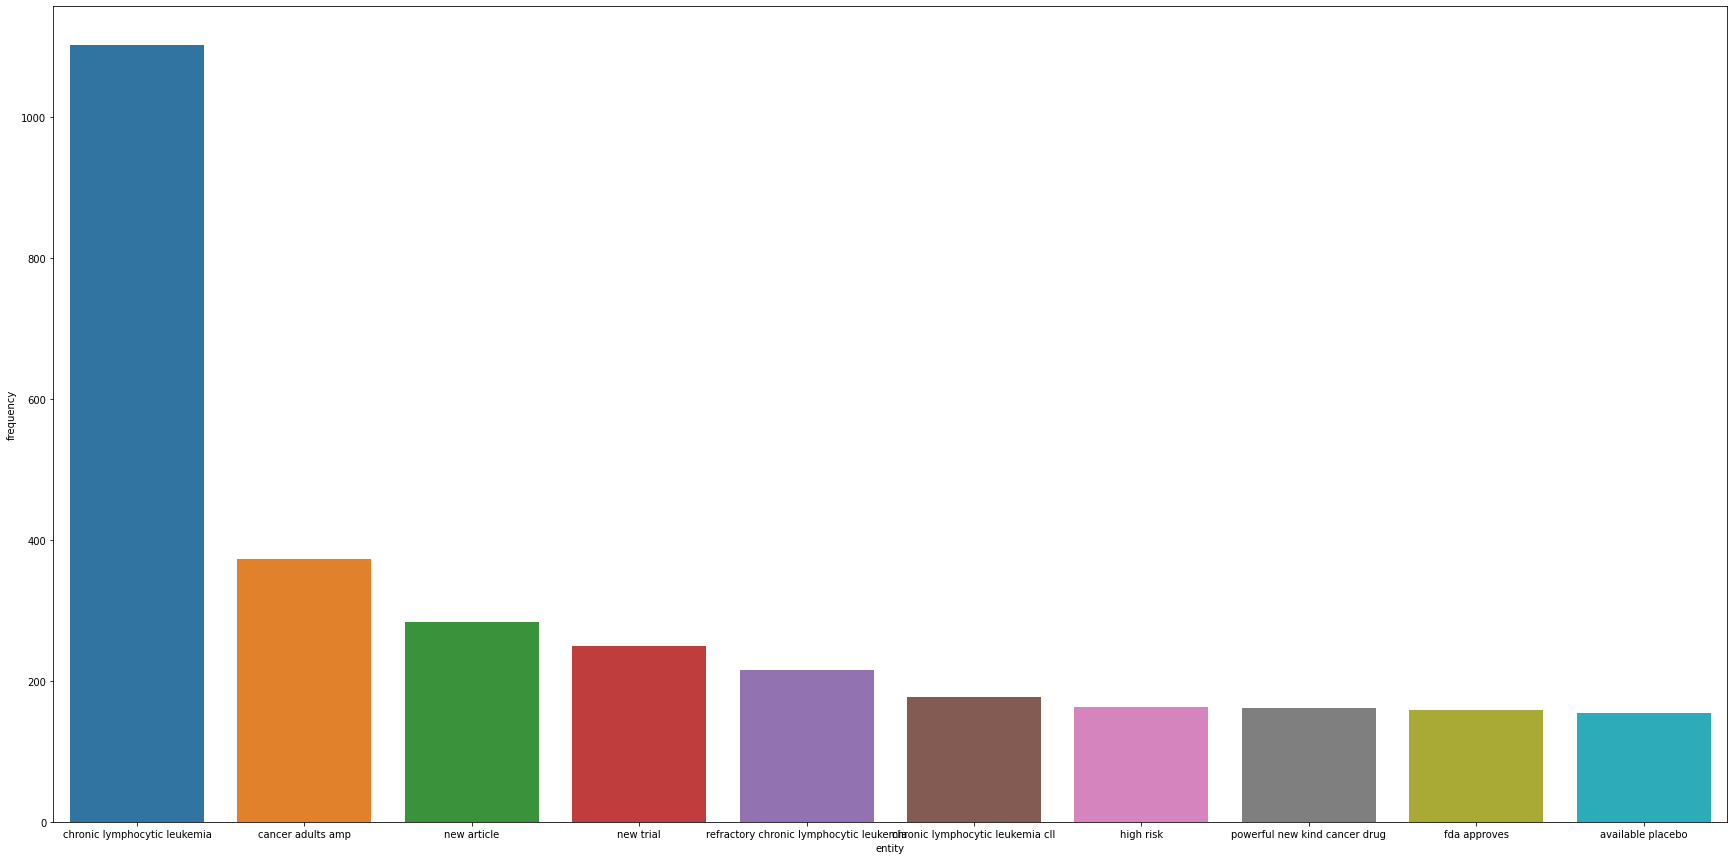

In [48]:
#Data Visualization with bar graph
df_new=entity_df.copy()

df_new = df_new.nlargest(columns="frequency", n = 10) 
plt.figure(figsize=(30,15))
ax = sns.barplot(data=df_new, x= "entity", y = "frequency")
ax.set(ylabel = 'frequency')
plt.show()

In [52]:
from wordcloud import WordCloud


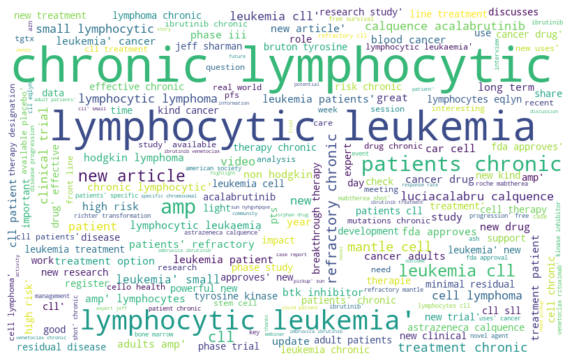

In [53]:
all_words = ' '.join([text for text in df['clean_tweet']])
#Wc = wordcloud(width=800, height=500, random_state=21, max_font_size=110)
wc = WordCloud(background_color='white',mode="RGB", width=800 , height=500, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
entity=entity_df["entity"]
entity[0]


'chronic lymphocytic leukemia'

In [31]:
frequency=entity_df["frequency"]
frequency[0]

1102

In [33]:
entity_df.to_csv("Objective1.csv")


In [34]:
df=data.copy()

In [35]:
df

,tweet_author,tweet_text,clean_tweet,entities
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists conducted phase study acalabrutinib...,"[phase study acalabrutinib patients, refractor..."
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,phase acalabrutinib venetoclax trial still rec...,"[phase acalabrutinib venetoclax trial, recruit..."
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,backs lpdogra,[backs lpdogra]
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,valuable option pts intolerant valuable data h...,"[valuable option pts intolerant, valuable data..."
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice recommended use acalabrutinib patients tr...,[acalabrutinib patients treatment chronic lymp...
...,...,...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...,hanging friends http pdleww bbb,[friends http pdleww bbb]
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...,hanging friends http gynchdnul,[friends http gynchdnul]
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...,zusatznutzen von ist weder noch refrakt res fo...,[zusatznutzen von ist weder noch refrakt res f...
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,ptk expression immunochemotherapy outcome chro...,[ptk expression immunochemotherapy outcome chr...


In [36]:
#Importing required library
import pandas as pd
import re
import plotly.express as px
import nltk
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [37]:
nlp = spacy.load('en_core_web_sm')


In [38]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.8 MB/s eta 0:00:00


In [39]:
#Importing the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

#Sentiment Analysis
SIA = SentimentIntensityAnalyzer()

df["clean_tweet"]= df["entities"].astype(str)
# Applying Model, Variable Creation
df['Polarity Score']=df["entities"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["entities"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["entities"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["entities"].apply(lambda x:SIA.polarity_scores(x)['pos'])


# Converting 0 to 1 Decimal Score to a Categorical Variable
df['overall polarity']=''
df.loc[df['Polarity Score']>0,'overall polarity']='Positive'
df.loc[df['Polarity Score']==0,'overall polarity']='Neutral'
df.loc[df['Polarity Score']<0,'overall polarity']='Negative'
df[:5]

,tweet_author,tweet_text,clean_tweet,entities,Polarity Score,Neutral Score,Negative Score,Positive Score,overall polarity
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,"['phase study acalabrutinib patients', 'refrac...","[phase study acalabrutinib patients, refractor...",0.0000,1.000,0.000,0.000,Neutral
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,"['phase acalabrutinib venetoclax trial', 'recr...","[phase acalabrutinib venetoclax trial, recruit...",0.0000,1.000,0.000,0.000,Neutral
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,['backs lpdogra'],[backs lpdogra],-0.0516,0.455,0.545,0.000,Negative
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,"['valuable option pts intolerant', 'valuable d...","[valuable option pts intolerant, valuable data...",0.4767,0.693,0.000,0.307,Positive
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,['acalabrutinib patients treatment chronic lym...,[acalabrutinib patients treatment chronic lymp...,0.0000,1.000,0.000,0.000,Neutral


In [40]:
df2=df.copy()
df2

,tweet_author,tweet_text,clean_tweet,entities,Polarity Score,Neutral Score,Negative Score,Positive Score,overall polarity
0,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,"['phase study acalabrutinib patients', 'refrac...","[phase study acalabrutinib patients, refractor...",0.0000,1.000,0.000,0.000,Neutral
1,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,"['phase acalabrutinib venetoclax trial', 'recr...","[phase acalabrutinib venetoclax trial, recruit...",0.0000,1.000,0.000,0.000,Neutral
2,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,['backs lpdogra'],[backs lpdogra],-0.0516,0.455,0.545,0.000,Negative
3,Toby Eyre,#acalabrutinib is a valuable option in pts int...,"['valuable option pts intolerant', 'valuable d...","[valuable option pts intolerant, valuable data...",0.4767,0.693,0.000,0.307,Positive
4,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,['acalabrutinib patients treatment chronic lym...,[acalabrutinib patients treatment chronic lymp...,0.0000,1.000,0.000,0.000,Neutral
...,...,...,...,...,...,...,...,...,...
43342,Joy is a Lifestyle,Hanging out with Friends! :) #FF #CLL #Happine...,['friends http pdleww bbb'],[friends http pdleww bbb],0.4767,0.492,0.000,0.508,Positive
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Hanging out with Friends! :) #FF #CLL #Happine...,['friends http gynchdnul'],[friends http gynchdnul],0.4767,0.392,0.000,0.608,Positive
43344,IQWiG,Zusatznutzen von #Idelalisib ist weder für #CL...,['zusatznutzen von ist weder noch refrakt res ...,[zusatznutzen von ist weder noch refrakt res f...,0.0000,1.000,0.000,0.000,Neutral
43345,Medibooks,#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...,['ptk expression immunochemotherapy outcome ch...,[ptk expression immunochemotherapy outcome chr...,0.0000,1.000,0.000,0.000,Neutral


In [41]:
#Dropping the excess columns
df2=df2.drop(['tweet_text',	'clean_tweet',	'Polarity Score',	'Neutral Score',	'Negative Score',	'Positive Score'], axis=1)

In [42]:
#Making the entites along with author sentiments on it as a list
df2['entities'] = [','.join([''.join(y) for y in x]) for x in data['entities']]

In [43]:
df2

,tweet_author,entities,overall polarity
0,Hematopoiesis News,"phase study acalabrutinib patients,refractory ...",Neutral
1,"Michael Wang, MD","phase acalabrutinib venetoclax trial,recruitme...",Neutral
2,1stOncology,backs lpdogra,Negative
3,Toby Eyre,"valuable option pts intolerant,valuable data,d...",Positive
4,Lymphoma Hub,acalabrutinib patients treatment chronic lymph...,Neutral
...,...,...,...
43342,Joy is a Lifestyle,friends http pdleww bbb,Positive
43343,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,friends http gynchdnul,Positive
43344,IQWiG,zusatznutzen von ist weder noch refrakt res fo...,Neutral
43345,Medibooks,ptk expression immunochemotherapy outcome chro...,Neutral


In [44]:
#Changing the format 
df2=df2[['entities','tweet_author','overall polarity']]
     

In [45]:
df2.rename(columns = {'entities':'entity','tweet_author':'author'}, inplace = True)


In [46]:
df2

,entity,author,overall polarity
0,"phase study acalabrutinib patients,refractory ...",Hematopoiesis News,Neutral
1,"phase acalabrutinib venetoclax trial,recruitme...","Michael Wang, MD",Neutral
2,backs lpdogra,1stOncology,Negative
3,"valuable option pts intolerant,valuable data,d...",Toby Eyre,Positive
4,acalabrutinib patients treatment chronic lymph...,Lymphoma Hub,Neutral
...,...,...,...
43342,friends http pdleww bbb,Joy is a Lifestyle,Positive
43343,friends http gynchdnul,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Positive
43344,zusatznutzen von ist weder noch refrakt res fo...,IQWiG,Neutral
43345,ptk expression immunochemotherapy outcome chro...,Medibooks,Neutral


In [47]:
df2.to_csv("Objective2.csv")
